# Подключаем библиотеки

In [105]:
import numpy  as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.ensemble        import RandomForestRegressor
from sklearn.ensemble        import ExtraTreesRegressor
from sklearn.linear_model    import Ridge
from sklearn.linear_model    import LinearRegression
from sklearn.linear_model    import SGDRegressor
from sklearn.neighbors       import KNeighborsRegressor
from sklearn.neural_network  import MLPRegressor
from sklearn.metrics         import mean_absolute_error

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

# Преобразуем Данные

In [52]:
data = pd.read_excel("USD_CURRENCY.xlsx")
data.head()

,nominal,data,curs,cdx
0,1,2018-01-10,57.0463,Доллар США
1,1,2018-01-11,56.8734,Доллар США
2,1,2018-01-12,56.9957,Доллар США
3,1,2018-01-13,56.6019,Доллар США
4,1,2018-01-16,56.3569,Доллар США


In [53]:
values = data.curs # Список с курсом рубля
values.head()

0    57.0463
1    56.8734
2    56.9957
3    56.6019
4    56.3569
Name: curs, dtype: float64

Text(0, 0.5, 'Руб')

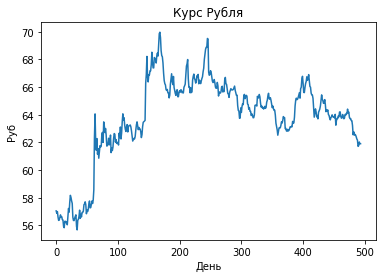

In [57]:
plt.plot(values)
plt.title('Курс Рубля')
plt.xlabel('День')
plt.ylabel('Руб')

Будем предсказывать future дней на основе past предыдущих

In [58]:
future = 7   # Сколько дней хотим предсказать
past   = 28  # На основе скольких дней делаем предсказание

start  = past
end    = len(values) - future

Преобразуем данные к удобному виду. Для этого введем past и future колонки

In [61]:
raw_data = []
for i in range(start, end):
    past_and_future_values = values[(i - past):(i + future)]
    raw_data.append(list(past_and_future_values))

past_columns = []
for i in range(past):
    past_columns.append("past_{}".format(i))
    
future_columns = []
for i in range(future):
    future_columns.append("future_{}".format(i))

In [63]:
df = pd.DataFrame(raw_data, columns = (past_columns + future_columns))
df.head()

,past_0,past_1,past_2,past_3,past_4,past_5,past_6,past_7,past_8,past_9,...,past_25,past_26,past_27,future_0,future_1,future_2,future_3,future_4,future_5,future_6
0,57.0463,56.8734,56.9957,56.6019,56.3569,56.3878,56.5925,56.7597,56.5892,56.6261,...,57.7701,57.5899,56.5918,56.3554,56.3438,56.5201,56.6537,56.7608,55.9208,55.6717
1,56.8734,56.9957,56.6019,56.3569,56.3878,56.5925,56.7597,56.5892,56.6261,56.4115,...,57.5899,56.5918,56.3554,56.3438,56.5201,56.6537,56.7608,55.9208,55.6717,56.3742
2,56.9957,56.6019,56.3569,56.3878,56.5925,56.7597,56.5892,56.6261,56.4115,56.3888,...,56.5918,56.3554,56.3438,56.5201,56.6537,56.7608,55.9208,55.6717,56.3742,56.4334
3,56.6019,56.3569,56.3878,56.5925,56.7597,56.5892,56.6261,56.4115,56.3888,55.9288,...,56.3554,56.3438,56.5201,56.6537,56.7608,55.9208,55.6717,56.3742,56.4334,56.6616
4,56.3569,56.3878,56.5925,56.7597,56.5892,56.6261,56.4115,56.3888,55.9288,55.8288,...,56.3438,56.5201,56.6537,56.7608,55.9208,55.6717,56.3742,56.4334,56.6616,57.1000


In [64]:
X = df[past_columns]
y = df[future_columns]

Разделим данные на тестовую и тренировочные выборки. Тестовую выборку возьмем 10% от всего датасета

In [72]:
data = train_test_split(X.to_numpy(), y.to_numpy(), test_size = 0.1, random_state = 42)

# Обучение модели

In [109]:
def model_train(model, data, model_name = "MyBestModel", plot = True):
    
    """
    Функция для тренировки модели
    Рисует график тренировки
    
    Аргументы:
    
    model      - наша модель
    data       - (X_train, X_test, y_train, y_test)
    model_name - название модели
    plot       - строить ли график, default = True
    
    Возвращает:
    
    Среднюю Квадратическую Ошибку модели   
    """
    
    X_train, X_test, y_train, y_test = data
    
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    error      = mean_absolute_error(prediction, y_test)
    
    if plot:
    
        plt.title("Error {} = {:.2f}".format(model_name, error))
        plt.plot(prediction[0], label = "predict"  )
        plt.plot(y_test[0]    , label = "real data")
        plt.legend()
        plt.show()
    
    return error
    

Обучим разные модели

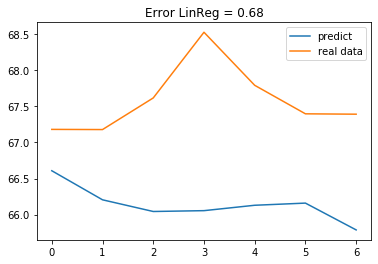

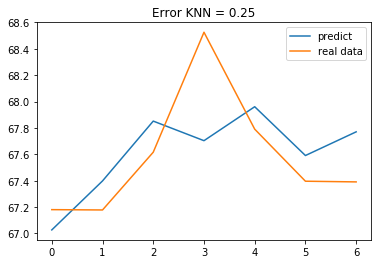

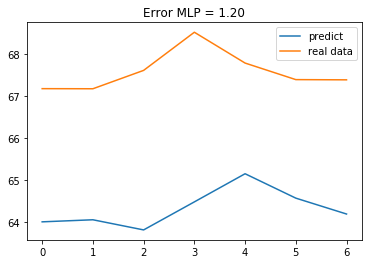

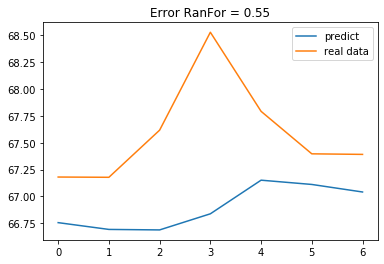

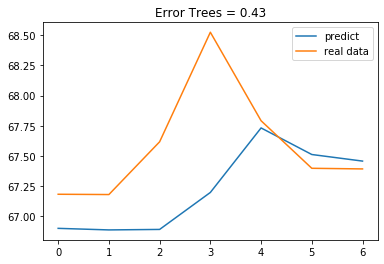

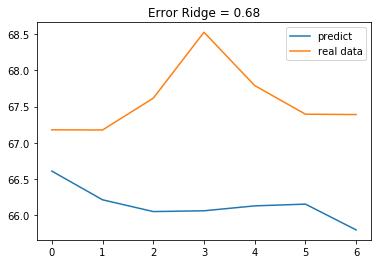

In [106]:
models = [
    LinearRegression(),
    KNeighborsRegressor(n_neighbors = 2),
    MLPRegressor(max_iter = 1000, random_state = 42),
    RandomForestRegressor(n_estimators = 200, random_state = 42),
    ExtraTreesRegressor(random_state = 42),
    Ridge(max_iter = 1000, random_state = 42)
]

models_name = ["LinReg", "KNN", "MLP", "RanFor", "Trees", "Ridge"]

for idx, model in enumerate(models):
    model_train(model, data, models_name[idx])

### Видим что наилучший результат показала модель основанная на методе ближайших соседей

# Попробуем подобрать гиперпараметры так, чтобы получить результат лучше

#### 1) KNeighborsRegressor

Text(0, 0.5, 'Ошибка')

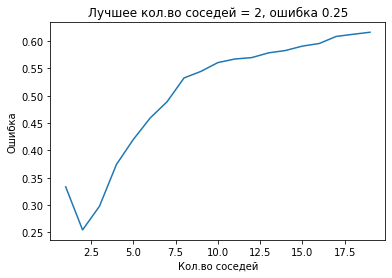

In [126]:
# будем настраивать число ближайших соседей - n_neighbors

n_neighbors_list   = list(range(1, 20)) 
error_history      = []

for n_neighbors in n_neighbors_list:
    
    model = KNeighborsRegressor(n_neighbors = n_neighbors) # делаем модель
    error = model_train(model, data, plot = False)
    error_history.append(error)
    
min_error    = min(error_history)             # минимальная ошибка
index        = error_history.index(min_error) # индекс минимальной ошибки
min_neighbor = n_neighbors_list[index]
    
plt.plot(n_neighbors_list, error_history)
plt.title('Лучшее кол.во соседей = {}, ошибка {:.2f}'.format(min_neighbor, min_error))
plt.xlabel('Кол.во соседей')
plt.ylabel('Ошибка')

Видим что оптимальное количество соседей равно 2

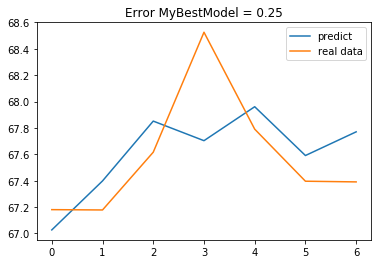

0.25438245341614923

In [135]:
# Обучим лучшую модель

best_model = KNeighborsRegressor(n_neighbors = 2)
model_train(best_model, data)

#### 2) MLPRegressor

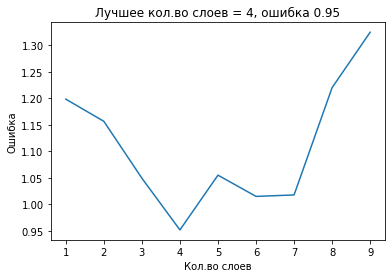

In [132]:
# Найдем оптимальное колличество слоев

hidden_layer  = []
error_history = []

for i in range(1, 10):  # ищем оптимальное кол.во слоев в интервале от 1 до 10 с шагом 1
    
    hidden_layer.append(100)
    model = MLPRegressor(hidden_layer_sizes = hidden_layer, random_state = 42)
    error = model_train(model, data, plot=False)
    error_history.append(error)

min_error        = min(error_history)                 # минимальная ошибка
min_error_layers = error_history.index(min_error) + 1 # кол во слоев при минимальной ошибке
    
plt.plot(range(1, 10), error_history)
plt.title('Лучшее кол.во слоев = {}, ошибка {:.2f}'.format(min_error_layers, min_error))
plt.xlabel('Кол.во слоев')
plt.ylabel('Ошибка')    

 Оптимальное количество слоев 4. При большем размере модель плохо обучается из-за затухания градиента. Это значит что веса модели обновляются на очень маленькое значение, и обучение затянется

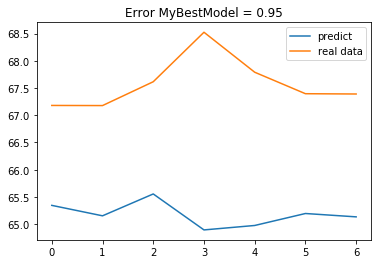

0.9513581354340107

In [134]:
# Обучим лучшую модель

best_model = MLPRegressor(hidden_layer_sizes=(100, 100, 100, 100), max_iter=1000, random_state = 42)
model_train(best_model, data)

#### 3) RandomForestRegressor

Text(0, 0.5, 'Ошибка')

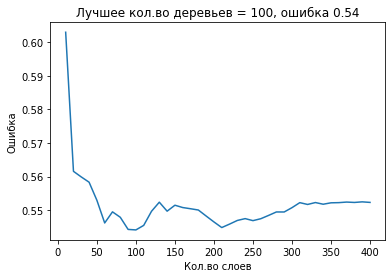

In [140]:
# Найдем оптимальное колличество деревьев в случайном лесу

n_estimators_list  = range(10, 410, 10) # ищем в интервале от 10 до 400 с шагом 10
error_history      = []

for n_estimators in n_estimators_list:
    
    model = RandomForestRegressor(n_estimators = n_estimators, random_state = 42)
    error = model_train(model, data, plot=False)
    error_history.append(error)

min_error            = min(error_history)              # минимальная ошибка
index                = error_history.index(min_error)  # индекс при минимальном колличестве деревьев   
min_error_estimators = n_estimators_list[index]        # кол во деревьев при минимальной ошибке
    
plt.plot(n_estimators_list, error_history)
plt.title('Лучшее кол.во деревьев = {}, ошибка {:.2f}'.format(min_error_estimators, min_error))
plt.xlabel('Кол.во слоев')
plt.ylabel('Ошибка')    

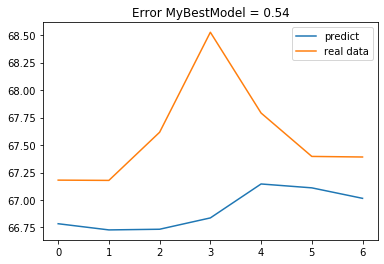

0.5441201366459649

In [141]:
# Обучим лучшую модель

best_model = RandomForestRegressor(n_estimators = 100, random_state = 42)
model_train(best_model, data)

#### 4)ExtraTreesRegressor

Text(0, 0.5, 'Ошибка')

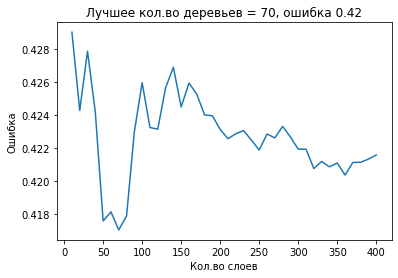

In [142]:
# Найдем оптимальное колличество деревьев

n_estimators_list  = range(10, 410, 10) # ищем в интервале от 10 до 400 с шагом 10
error_history      = []

for n_estimators in n_estimators_list:
    
    model = ExtraTreesRegressor(n_estimators = n_estimators, random_state = 42)
    error = model_train(model, data, plot=False)
    error_history.append(error)

min_error            = min(error_history)              # минимальная ошибка
index                = error_history.index(min_error)  # индекс при минимальном колличестве деревьев   
min_error_estimators = n_estimators_list[index]        # кол во деревьев при минимальной ошибке
    
plt.plot(n_estimators_list, error_history)
plt.title('Лучшее кол.во деревьев = {}, ошибка {:.2f}'.format(min_error_estimators, min_error))
plt.xlabel('Кол.во слоев')
plt.ylabel('Ошибка')

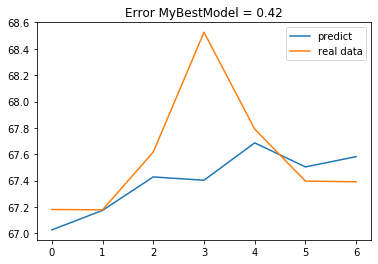

0.41702862466725976

In [143]:
# Обучим лучшую модель

best_model = ExtraTreesRegressor(n_estimators = 70, random_state = 42)
model_train(best_model, data)

# Вывод

In [145]:
result = pd.DataFrame({
    "model_name" : [
        "LinearRegression",
        "KNeighborsRegressor",
        "MLPRegressor",
        "RandomForestRegressor",
        "ExtraTreesRegressor",
        "Ridge"
    ],
    "min_error"  : [
        0.68,
        0.25,
        0.95,
        0.54,
        0.42,
        0.65
    ],
    "best_param" : [
        "-",
        "n_neighbors = 2",
        "hidden_layer_sizes = (100, 100, 100, 100)",
        "n_estimators = 100",
        "n_estimators = 70",
        "-"
    ]
})

### Я обучил нескольно моделей для предсказания курса рубля. В итоге:

In [146]:
result

,model_name,min_error,best_param
0,LinearRegression,0.68,-
1,KNeighborsRegressor,0.25,n_neighbors = 2
2,MLPRegressor,0.95,"hidden_layer_sizes = (100, 100, 100, 100)"
3,RandomForestRegressor,0.54,n_estimators = 100
4,ExtraTreesRegressor,0.42,n_estimators = 70
5,Ridge,0.65,-


### Откуда видим что метод ближайших соседей работает лучше всего